## Data Preprocessing:
- Load the Iris dataset.
- Perform data exploration and visualization.
- Check for missing values and handle them if any.
- Split the dataset into features and target variables.

In [1]:
# Load the neccesary libraries:-
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,Column1,Column2,Column3,Column4,Column5
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Check the missing values in each column
df.isnull().sum()

Column1    0
Column2    0
Column3    0
Column4    0
Column5    0
dtype: int64

In [4]:
# Display the total missing values in the dataset:
df.isnull().sum().sum()

0

In [5]:
# Change the column name into meaningful names:
df.rename(columns={'Column1':'SepalLengthCm', 'Column2':'SepalWidthCm', 'Column3':'PetalLengthCm','Column4':'PetalWidthCm','Column5':'Species'}, inplace=True)

In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 4].values

In [9]:
# Split the dataset into train set and test set:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [10]:
print('The shape of the train data:', 'X_train:',X_train.shape,'y_train:', y_train.shape)
print('The shape of the test data:', 'X_test:', X_test.shape,'y_test:', y_test.shape) 

The shape of the train data: X_train: (120, 4) y_train: (120,)
The shape of the test data: X_test: (30, 4) y_test: (30,)


## Unsupervised Learning: Clustering and Outlier Detection:
- Apply K-means clustering algorithm to cluster the data.
- Visualize the clusters.
- Detect outliers using appropriate techniques such as isolation forest or DBSCAN.
- Evaluate the clustering results.

In [11]:
# Import kmeans library
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
k_means = KMeans(n_clusters=2)
k_means.fit(X)

C:\Users\musta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\musta\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [12]:
X_sepal_length = df.loc[:, ['SepalLengthCm']]
X_sepal_width = df.loc[:, ['SepalWidthCm']]

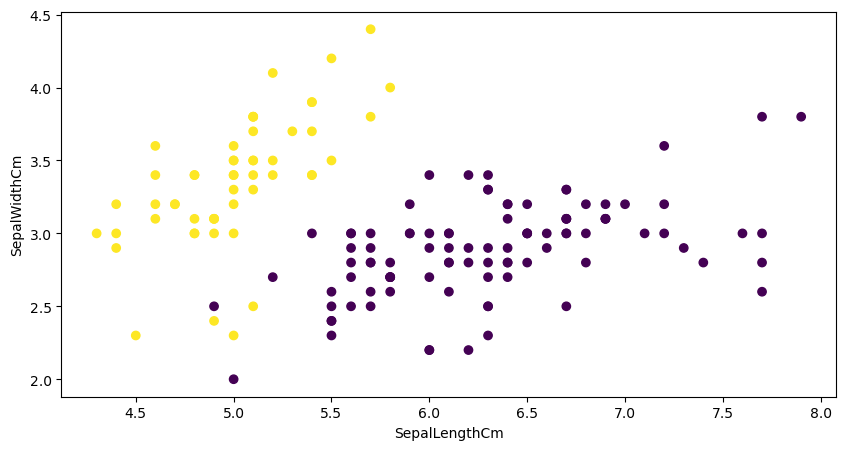

In [13]:
# Visualize the cluster with n_clusters = 2 for the sepal length & sepal width
plt.figure(figsize=(10,5))
plt.scatter(x= X_sepal_length['SepalLengthCm'], y=X_sepal_width['SepalWidthCm'], c=k_means.labels_)
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm');

In [14]:
y_Petal_length = df.loc[:, ['PetalLengthCm']]
y_Petal_width = df.loc[:, ['PetalWidthCm']]

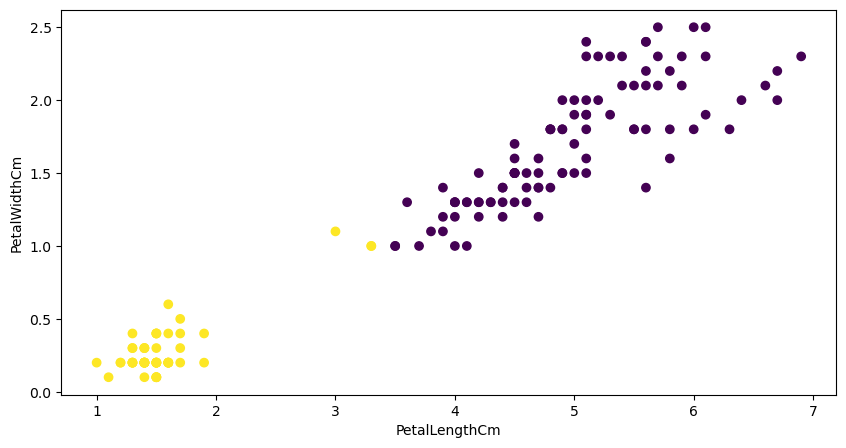

In [15]:
# Visualize the cluster with n_clusters = 2 for the petal length & petal width
plt.figure(figsize=(10,5))
plt.scatter(x= y_Petal_length['PetalLengthCm'], y=y_Petal_width['PetalWidthCm'], c=k_means.labels_)
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm');

In [16]:
# Handle missing vaules using DBSCAN
from sklearn.cluster import DBSCAN

DBSModel = DBSCAN(metric='euclidean',eps=0.0375, min_samples=20, algorithm='auto')
y_pred_train = DBSModel.fit_predict(X_train)
y_pred_test = DBSModel.fit_predict(X_test)

print('DBScanModel labels are:', DBSModel.labels_)
print('DBScanModel Train data are:', y_pred_train)
print('DBScanModel Test data are:', y_pred_test)

DBScanModel labels are: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]
DBScanModel Train data are: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
DBScanModel Test data are: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1]


In [17]:
nclusters = len(set(DBSModel.labels_)) - (1 if -1 in DBSModel.labels_ else 0)
n_noise = list(DBSModel.labels_).count(-1)

print('Estimated number of clusters: %d' % nclusters)
print('Estimated number of noises: %d' % n_noise)

Estimated number of clusters: 0
Estimated number of noises: 30


## Supervised Learning: Baseline Model:
- Choose an appropriate evaluation metric based on the problem (classification)
- Split the dataset into training and testing set
- Build a baseline model (e.g., logistic regression or decision tree) using default paramete
- Evaluate the baseline model's performarmance.

## Model Comparison:-  Select 3-4 machine learning algorithms (e.g., SVM, Random Forest, Gradient Boosting) suitable for the problem
- • Implement each algorithm and evaluate its performance using cross-validatio
-  • Compare the performance of algorithms based on evaluation metri
- 
 • Select the best-performing algorithm.

## Model Tuning and Ensemble:
-  Perform hyperparameter tuning on the best-performing algorithm using Grid Search or Random Search
- • Evaluate the tuned model's performan.
-  • Implement an ensemble of the top-performing algorithms and compare its performance with the tuned model.